<a href="https://colab.research.google.com/github/rajhazarika85/python/blob/main/Exploratory_Data_Analysis_Kaggle_dataset_student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

### Download Data from Kaggle


In [3]:
! pip install -q kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rajhazarika","key":"2a6b7991015b0fb8abf5fd4b6d86302f"}'}

- Make directory named kaggle and copy kaggle.json file there.
- Change the permissions of the file.


In [5]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d spscientist/students-performance-in-exams

  0% 0.00/8.70k [00:00<?, ?B/s]
100% 8.70k/8.70k [00:00<00:00, 20.2MB/s]


In [7]:
! unzip students-performance-in-exams.zip

Archive:  students-performance-in-exams.zip
  inflating: StudentsPerformance.csv  


### Import library

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [8]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
df.shape

(1000, 8)

In [12]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### nunique to show unique values for each column

In [13]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [14]:
df.gender.unique()

array(['female', 'male'], dtype=object)

### Cleaning the data

##### Check for null values

In [15]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

##### Dropping columns

In [19]:
student = df.drop(['race/ethnicity','parental level of education'], axis=1)
student.head()

,gender,lunch,test preparation course,math score,reading score,writing score
0,female,standard,none,72,72,74
1,female,standard,completed,69,90,88
2,female,standard,none,90,95,93
3,male,free/reduced,none,47,57,44
4,male,standard,none,76,78,75


### Relationship analysis

##### Correlation *analysis*

In [20]:
corr = student.corr()

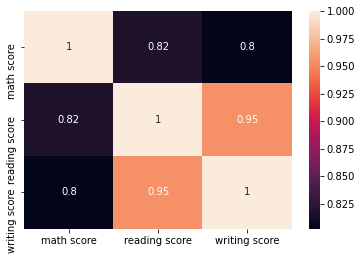

In [21]:
sns.heatmap(corr
            ,xticklabels=corr.columns
            ,yticklabels=corr.columns
            ,annot=True)

##### Pair plot analysis

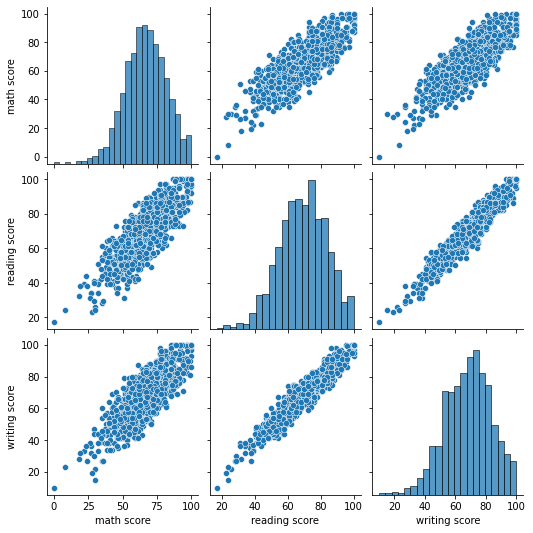

In [22]:
sns.pairplot(student)

##### Relation plot

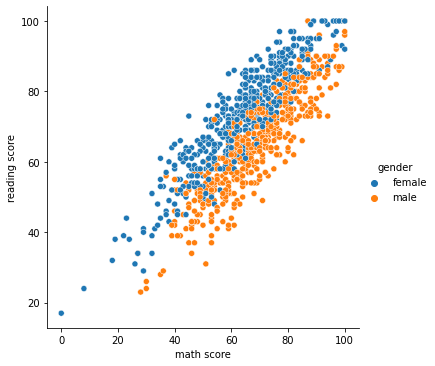

In [24]:
sns.relplot(x='math score', y='reading score', hue='gender', data=student)

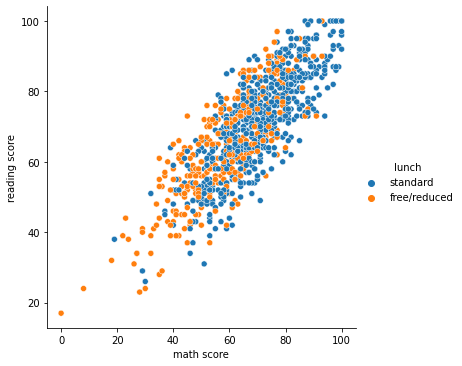

In [25]:
sns.relplot(x='math score', y='reading score', hue='lunch', data=student)

##### Histogram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


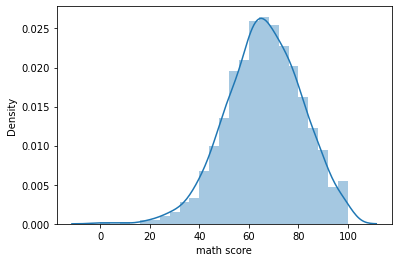

In [26]:
sns.distplot(student['math score'])

##### boxplot

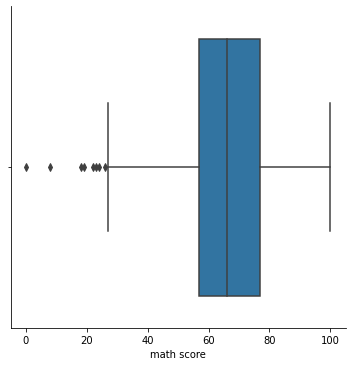

In [28]:
sns.catplot(x='math score', kind = 'box', data=student)